## 1- Binary classification : Unbalanced data


### 1.1- Data exploration :

This sample of data has huge unbalance between the two classes. The class "normal" has 97% of the data, We will use the F1 score to evaluate our model. our goal will be trying to improve the F1 score of the model using various technics .


In this part we will explore the data and try to understand it, first by watching the data and then by using some statistics.

In [1]:
!pip install klib
!pip install lazypredict

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as kl
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [6]:
data = pd.read_csv('./Train_data.csv')

In [7]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [9]:
data.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192,25192,25192,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,305.054104,NaN,NaN,NaN,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,NaN
std,2686.555640,NaN,NaN,NaN,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


In [10]:
data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

**We can see that the unbalnce is much more bigger than the norms to build a decent model, still we will try to do our best to improve the F1 score**

### 1.2- Data preprocessing :

In [12]:
# remove the rows with missing values

data.dropna()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [13]:
# remove the duplicated rows, we will ingore id column

print(data.shape)

data.drop_duplicates(subset=data.columns[1:],inplace=True)

print(data.shape)

(25192, 42)
(24995, 42)


**Even better, no duplicates in the data**

**No much outliers to worry about**


Now let's prepare the data for feature selection, we will do that by encoding the categorical features and scaling the numerical features.

for encoding we will use a good technic for classification target called "James-Stein encoding" which is a regularized version of the mean encoding.

In [15]:
!pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 920.2 kB/s eta 0:00:00


In [16]:
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder()


from sklearn.preprocessing import LabelEncoder
data['class'] = LabelEncoder().fit_transform(data['class'])

for col in data.columns:
    if col != 'class' and not is_numeric_dtype(data[col]):
        data[col] = encoder.fit_transform(data[col], data['class'])


### 1.3 Feature selection :



We will use 3 methods for feature selection

<Axes: title={'center': 'Feature-correlation (pearson)'}>

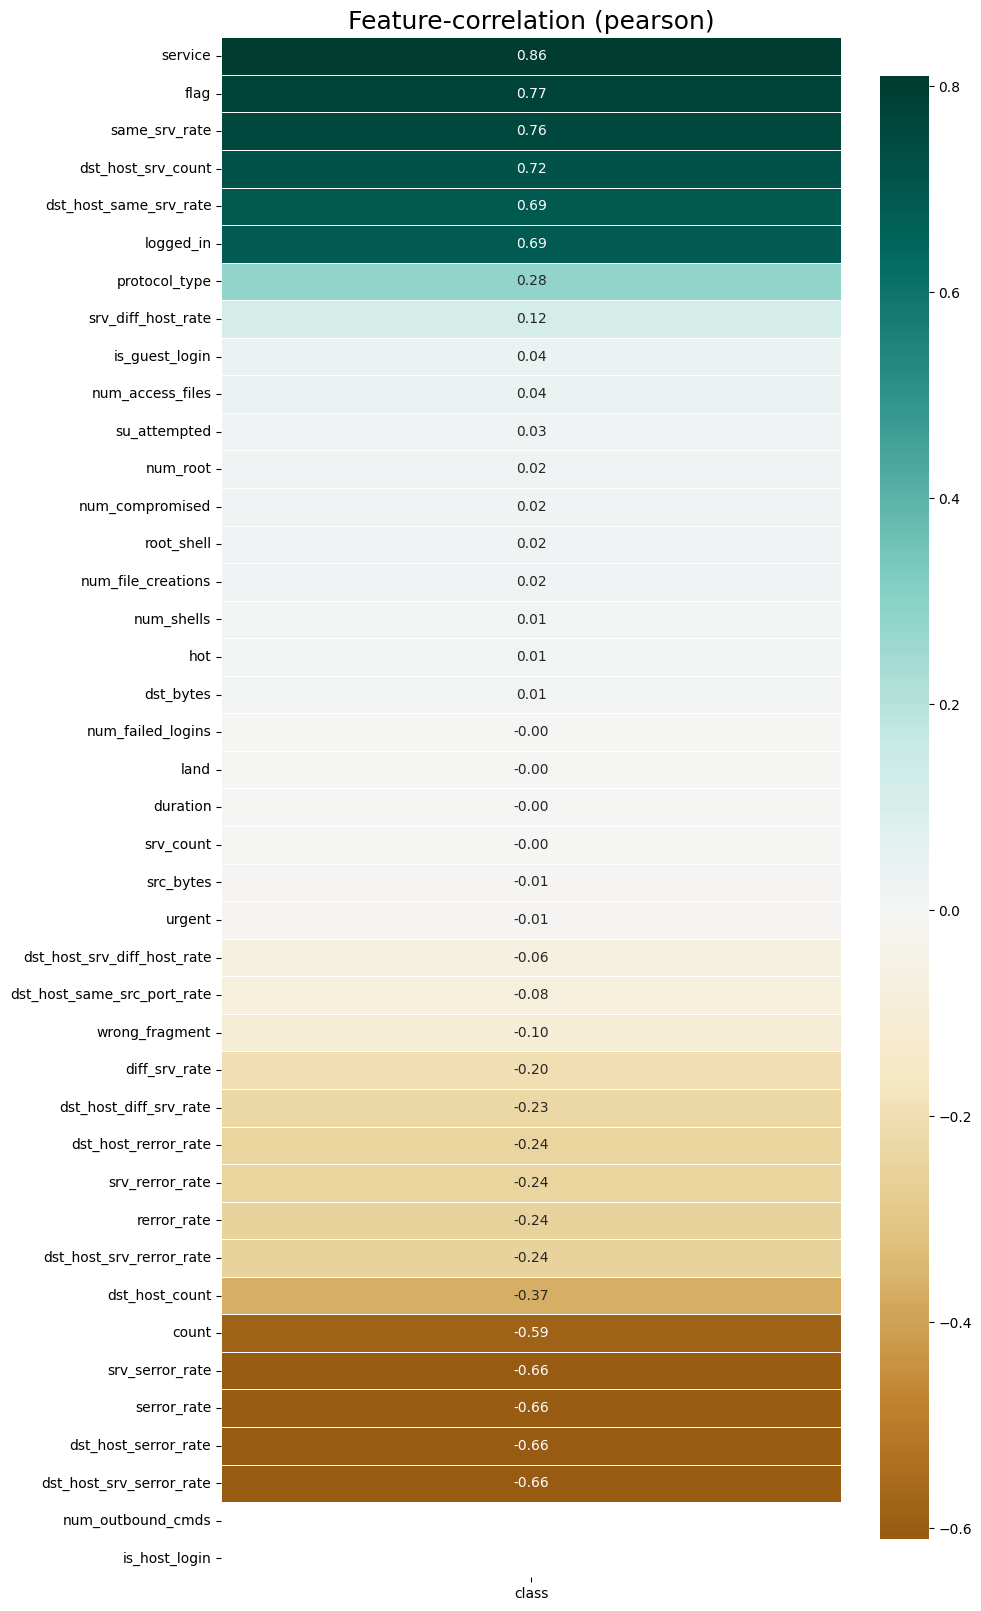

In [17]:
# using coreelation matrix to find the most important features

kl.corr_plot(data,figsize=(10,20),target='class')

In [19]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [22]:
# using catboost to find the most important features

from catboost import CatBoostClassifier


X = data.drop('class',axis=1)
y = data['class']


model = CatBoostClassifier()
model.fit(X,y)

feature_importance = model.get_feature_importance()
feature_names = X.columns
for score, name in sorted(zip(feature_importance, feature_names), reverse=True):
    print('{}: {}'.format(name, score))


Learning rate set to 0.040721
0:	learn: 0.5515189	total: 93.8ms	remaining: 1m 33s
1:	learn: 0.4298611	total: 165ms	remaining: 1m 22s
2:	learn: 0.3344264	total: 204ms	remaining: 1m 7s
3:	learn: 0.2629194	total: 283ms	remaining: 1m 10s
4:	learn: 0.2044512	total: 347ms	remaining: 1m 8s
5:	learn: 0.1625110	total: 409ms	remaining: 1m 7s
6:	learn: 0.1278520	total: 456ms	remaining: 1m 4s
7:	learn: 0.1015837	total: 494ms	remaining: 1m 1s
8:	learn: 0.0803249	total: 527ms	remaining: 58s
9:	learn: 0.0645282	total: 564ms	remaining: 55.8s
10:	learn: 0.0521686	total: 579ms	remaining: 52.1s
11:	learn: 0.0424791	total: 596ms	remaining: 49s
12:	learn: 0.0346868	total: 619ms	remaining: 47s
13:	learn: 0.0284920	total: 639ms	remaining: 45s
14:	learn: 0.0235352	total: 668ms	remaining: 43.8s
15:	learn: 0.0196008	total: 702ms	remaining: 43.2s
16:	learn: 0.0162996	total: 745ms	remaining: 43.1s
17:	learn: 0.0138118	total: 799ms	remaining: 43.6s
18:	learn: 0.0118867	total: 849ms	remaining: 43.8s
19:	learn: 0.01

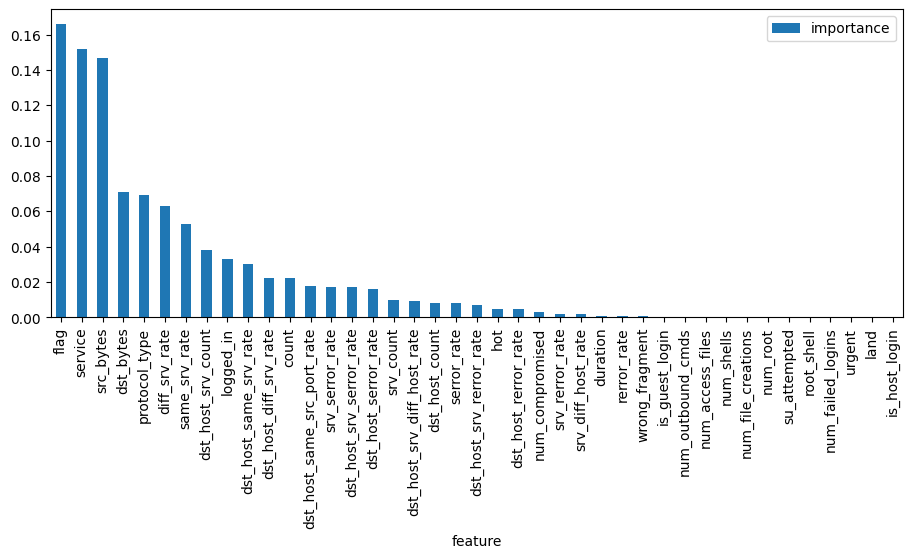

In [23]:
# using random forest to find the most important features

from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier();
rfc.fit(X, y);

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [24]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

From the insights we had from feature selection we will drop some features and keep the others for the next steps. we made 2 splits and we try runing the models on both of them to see which one is better.

In [26]:

data = data.loc[:,['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'class']]

**Important Phase : next we will use a data augmentation method called SMOTE to balance the data, we will use it only on the train set to avoid overfitting, but we don't want to test our data on a made up data from SMOT, so we will use stratified sampling to keep the test data for later**

In [27]:
# Stratified Sampling

X= data.drop('class',axis=1)
y= data['class']


# create a boolean mask for the second class
second_class_mask = (y == 1)

# split the second class into train and test sets
X_second_class = X[second_class_mask]
y_second_class = y[second_class_mask]
X_second_class_train, X_second_class_test, y_second_class_train, y_second_class_test = train_test_split(
    X_second_class, y_second_class, test_size=0.3, random_state=42)

# create a boolean mask for the first class
first_class_mask = (y == 0)

# split the first class into train and test sets
X_first_class = X[first_class_mask]
y_first_class = y[first_class_mask]
X_first_class_train, X_first_class_test, y_first_class_train, y_first_class_test = train_test_split(
    X_first_class, y_first_class, test_size=0.3, random_state=42)

# shuffle the train and test sets for each class
np.random.seed(42)
shuffle_idx_train = np.random.permutation(len(X_first_class_train) + len(X_second_class_train))
shuffle_idx_test = np.random.permutation(len(X_first_class_test) + len(X_second_class_test))
a = np.concatenate([X_first_class_train, X_second_class_train])[shuffle_idx_train]            #a is a dummy variable
b = np.concatenate([y_first_class_train, y_second_class_train])[shuffle_idx_train]             #b is a dummy variable
X_test = np.concatenate([X_first_class_test, X_second_class_test])[shuffle_idx_test]
y_test = np.concatenate([y_first_class_test, y_second_class_test])[shuffle_idx_test]            # we will use this for the final test

In [28]:
pd.Series(y_test).value_counts()

1    4026
0    3473
dtype: int64

### 1.4- Data Augmentation :

Now we're ready for data augmentation

In [29]:
print(data.shape)         # just to check the shape of the data

(24995, 11)


In [30]:
print(data['class'].value_counts())         # same here to remind us of the distribution of the classes

1    13420
0    11575
Name: class, dtype: int64


In [31]:
# SMOTE Oversampling

from imblearn.over_sampling import SMOTE

X = data.drop('class',axis=1)
y = data['class']

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print(X_smote.shape)
print(y_smote.shape)

(26840, 10)
(26840,)


In [32]:
print(y_smote.value_counts())

1    13420
0    13420
Name: class, dtype: int64


<Axes: >

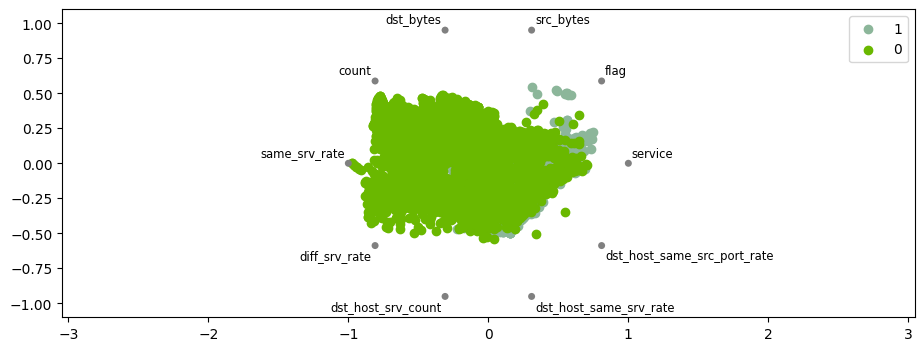

In [33]:
pd.plotting.radviz(data, 'class')

**As we can see the data is now balanced**

### 1.5- Modeling :


we will build a function to evaluate all the models we will use, we will use the F1 score as a metric to evaluate the models, we will also use the ROC curve to see the performance of the models.


For modeling we left you with 2 choices, you can either use lazyclassifier to see a lot of testings of models or you can use the models we used in the function we built, we will use the function to test the models and then we will use the best model to tune it's hyperparameters.

In [34]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X = X_smote
y = y_smote

X_train, a, y_train, b = train_test_split(X, y, test_size=0.3, random_state=101)  # a,b are dummy variables



In [35]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
# Model Building : our function to evaluate the model using cross validation and other metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score



def model_eval(model,X,y):

    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")

    model.fit(X, y)
    pred = model.predict(X_test)


    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(accuracy_score(y_test, pred))
    print(roc_auc_score(y_test, pred))


    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

Now let's start testing some models

ROC AUC: 0.9891 (+/- 0.0014)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3473
           1       0.97      0.96      0.97      4026

    accuracy                           0.96      7499
   macro avg       0.96      0.96      0.96      7499
weighted avg       0.96      0.96      0.96      7499

[[3341  132]
 [ 148 3878]]
0.9626616882250967
0.9626157302612204


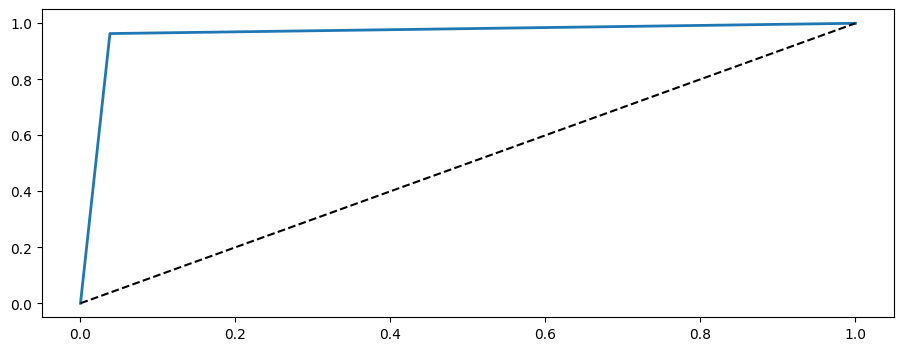

In [43]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_eval(model,X_train,y_train)


ROC AUC: 0.9869 (+/- 0.0022)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3473
           1       1.00      1.00      1.00      4026

    accuracy                           1.00      7499
   macro avg       1.00      1.00      1.00      7499
weighted avg       1.00      1.00      1.00      7499

[[3462   11]
 [  16 4010]]
0.9963995199359915
0.996429270782242


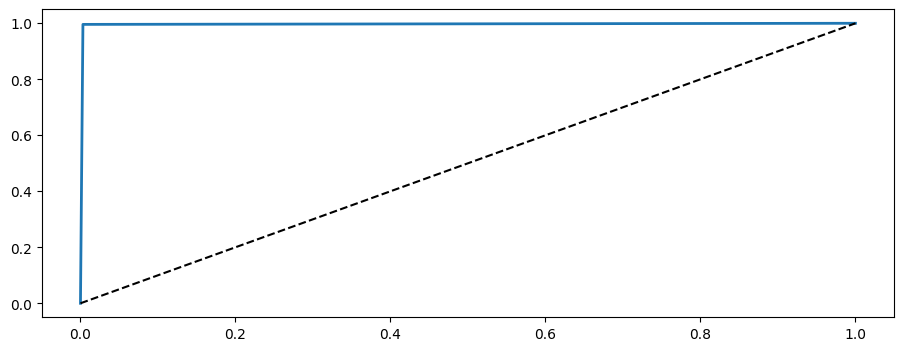

ROC AUC: 0.9924 (+/- 0.0015)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3473
           1       1.00      0.98      0.99      4026

    accuracy                           0.99      7499
   macro avg       0.99      0.99      0.99      7499
weighted avg       0.99      0.99      0.99      7499

[[3466    7]
 [  75 3951]]
0.9890652086944925
0.9896777697056665


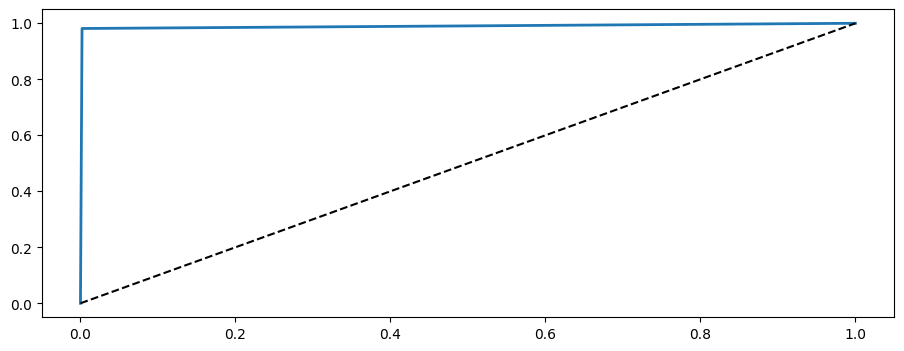

ROC AUC: 0.9934 (+/- 0.0016)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3473
           1       0.99      0.99      0.99      4026

    accuracy                           0.99      7499
   macro avg       0.99      0.99      0.99      7499
weighted avg       0.99      0.99      0.99      7499

[[3442   31]
 [  41 3985]]
0.9903987198293106
0.9904450970791784


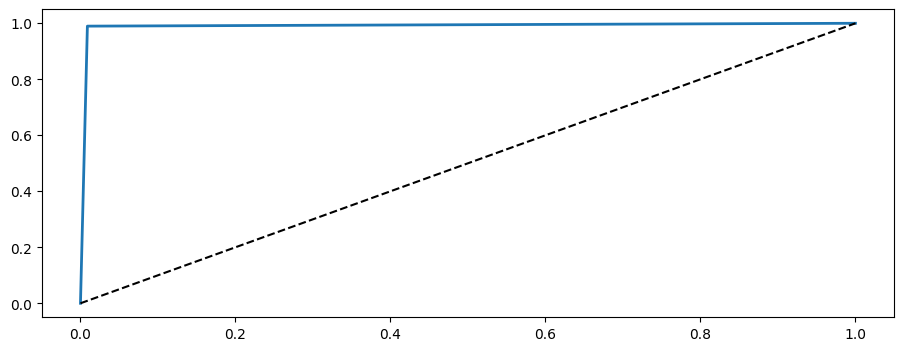

ROC AUC: 0.9941 (+/- 0.0015)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3473
           1       0.99      0.98      0.99      4026

    accuracy                           0.99      7499
   macro avg       0.99      0.99      0.99      7499
weighted avg       0.99      0.99      0.99      7499

[[3448   25]
 [  65 3961]]
0.9879983997866382
0.988328277655075


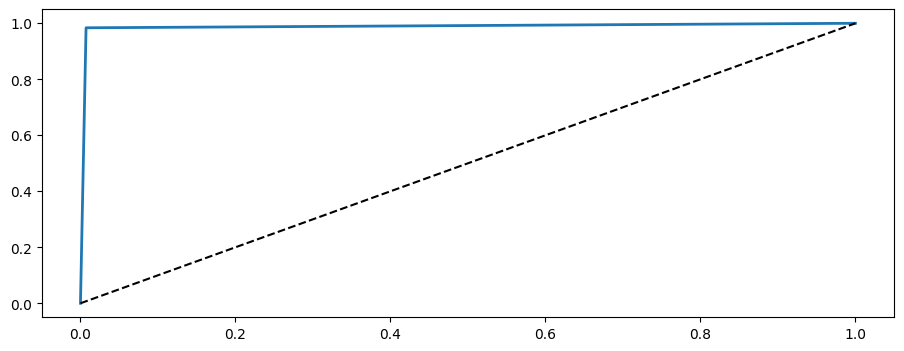

ROC AUC: 0.9950 (+/- 0.0012)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3473
           1       0.99      0.99      0.99      4026

    accuracy                           0.99      7499
   macro avg       0.99      0.99      0.99      7499
weighted avg       0.99      0.99      0.99      7499

[[3440   33]
 [  52 3974]]
0.9886651553540472
0.9887910413581515


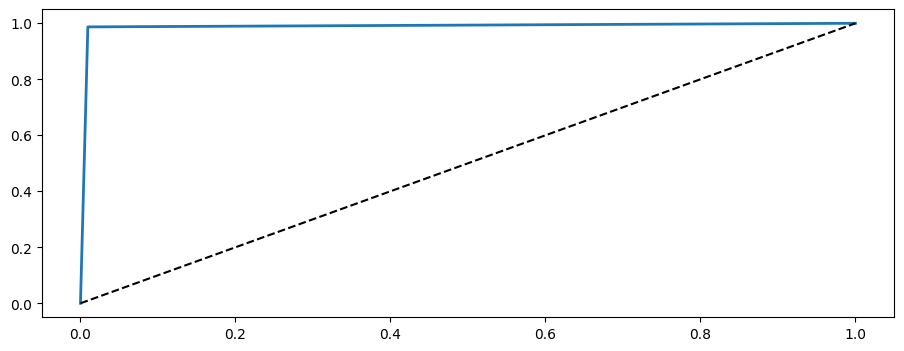

ROC AUC: 0.9956 (+/- 0.0013)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3473
           1       0.99      0.98      0.99      4026

    accuracy                           0.99      7499
   macro avg       0.99      0.99      0.99      7499
weighted avg       0.99      0.99      0.99      7499

[[3443   30]
 [  65 3961]]
0.9873316442192293
0.9876084388989563


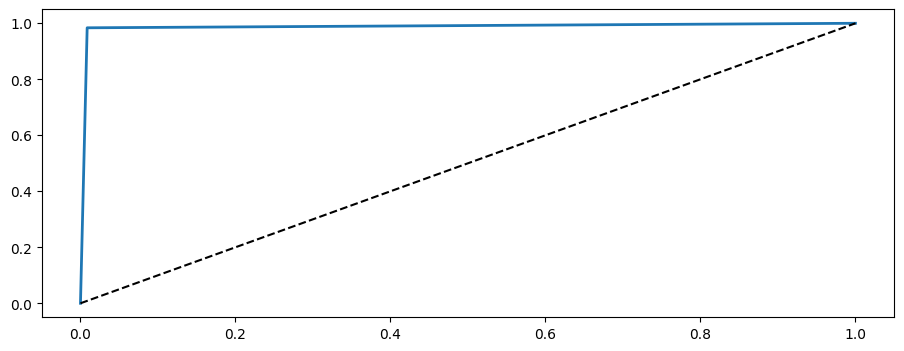

ROC AUC: 0.9957 (+/- 0.0013)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3473
           1       0.99      0.99      0.99      4026

    accuracy                           0.99      7499
   macro avg       0.99      0.99      0.99      7499
weighted avg       0.99      0.99      0.99      7499

[[3430   43]
 [  58 3968]]
0.9865315375383384
0.9866062073630529


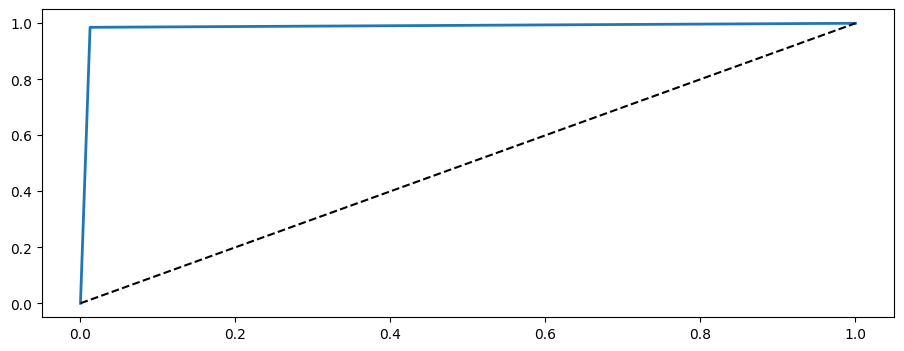

ROC AUC: 0.9959 (+/- 0.0012)
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3473
           1       0.99      0.98      0.99      4026

    accuracy                           0.98      7499
   macro avg       0.98      0.99      0.98      7499
weighted avg       0.98      0.98      0.98      7499

[[3434   39]
 [  75 3951]]
0.984797973063075
0.9850708016665072


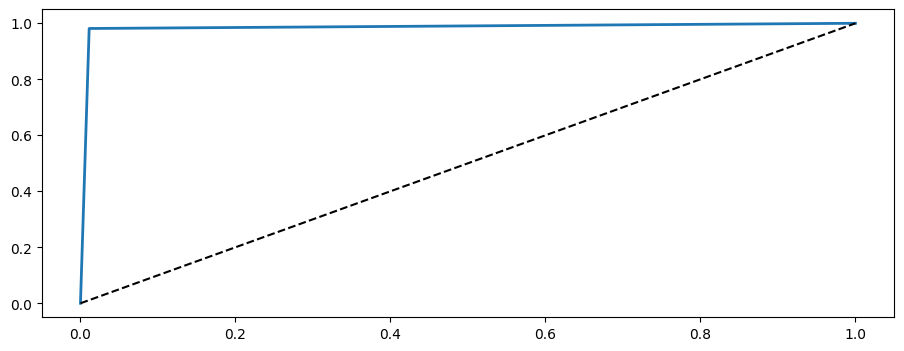

ROC AUC: 0.9959 (+/- 0.0011)
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3473
           1       0.99      0.98      0.99      4026

    accuracy                           0.98      7499
   macro avg       0.98      0.98      0.98      7499
weighted avg       0.98      0.98      0.98      7499

[[3428   45]
 [  70 3956]]
0.9846646219495933
0.9848279588948826


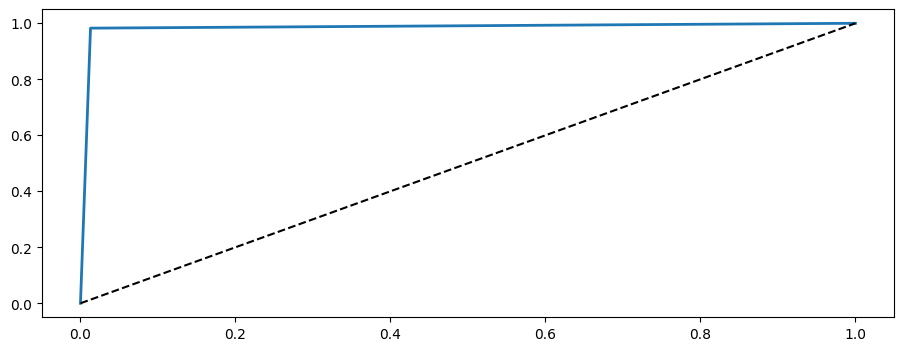

In [44]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model_eval(model,X_train,y_train)

using prvious method we found k=1 is the best value for KNN

ROC AUC: 0.9869 (+/- 0.0022)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3473
           1       1.00      1.00      1.00      4026

    accuracy                           1.00      7499
   macro avg       1.00      1.00      1.00      7499
weighted avg       1.00      1.00      1.00      7499

[[3462   11]
 [  16 4010]]
0.9963995199359915
0.996429270782242


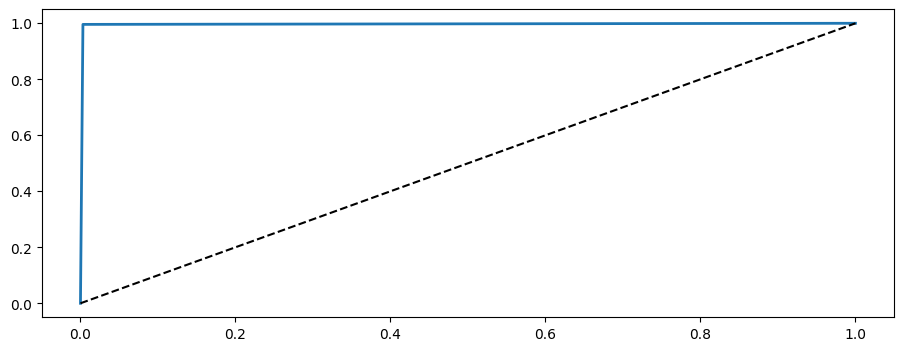

In [45]:
# KNN

model = KNeighborsClassifier(1)
model_eval(model,X_train,y_train)

ROC AUC: 1.0000 (+/- 0.0000)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3473
           1       1.00      1.00      1.00      4026

    accuracy                           1.00      7499
   macro avg       1.00      1.00      1.00      7499
weighted avg       1.00      1.00      1.00      7499

[[3473    0]
 [   3 4023]]
0.9995999466595547
0.9996274217585692


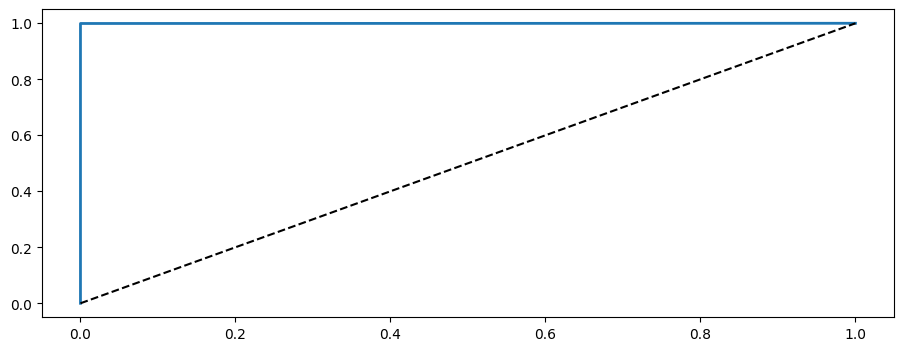

In [46]:
 #XGBoost


from xgboost import XGBClassifier

model = XGBClassifier()
model_eval(model,X_train,y_train)

In [37]:
# if you want fast reuslt , uncomment one of the models above and comment this cell
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [01:31<00:01,  1.26s/it]

[LightGBM] [Info] Number of positive: 9373, number of negative: 9415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 18788, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498882 -> initscore=-0.004471
[LightGBM] [Info] Start training from score -0.004471


100%|██████████| 29/29 [01:31<00:00,  3.15s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,1.00,1.00,0.45
RandomForestClassifier,1.00,1.00,1.00,1.00,1.58
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.08
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.85
XGBClassifier,1.00,1.00,1.00,1.00,0.25
BaggingClassifier,1.00,1.00,1.00,1.00,0.60
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.03
AdaBoostClassifier,1.00,1.00,1.00,1.00,1.53
KNeighborsClassifier,0.99,0.99,0.99,0.99,0.96


In [38]:
from sklearn.metrics import classification_report
for i in predictions.columns.tolist():
    print('\t\t',i,'\n')
    print(classification_report(y_test, predictions[i]),'\n')

		 AdaBoostClassifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3473
           1       1.00      1.00      1.00      4026

    accuracy                           1.00      7499
   macro avg       1.00      1.00      1.00      7499
weighted avg       1.00      1.00      1.00      7499
 

		 BaggingClassifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3473
           1       1.00      1.00      1.00      4026

    accuracy                           1.00      7499
   macro avg       1.00      1.00      1.00      7499
weighted avg       1.00      1.00      1.00      7499
 

		 BernoulliNB 

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      3473
           1       0.88      0.94      0.91      4026

    accuracy                           0.90      7499
   macro avg       0.90      0.89      0.90      7499
weight

Epoch 1/20
588/588 [==============================] - 3s 3ms/step - loss: 0.3043 - accuracy: 0.8796 - val_loss: 0.1175 - val_accuracy: 0.9677
Epoch 2/20
588/588 [==============================] - 2s 3ms/step - loss: 0.1627 - accuracy: 0.9545 - val_loss: 0.1080 - val_accuracy: 0.9697
Epoch 3/20
588/588 [==============================] - 2s 3ms/step - loss: 0.1472 - accuracy: 0.9602 - val_loss: 0.1031 - val_accuracy: 0.9707
Epoch 4/20
588/588 [==============================] - 2s 3ms/step - loss: 0.1367 - accuracy: 0.9607 - val_loss: 0.0983 - val_accuracy: 0.9724
Epoch 5/20
588/588 [==============================] - 3s 5ms/step - loss: 0.1292 - accuracy: 0.9619 - val_loss: 0.0960 - val_accuracy: 0.9727
Epoch 6/20
588/588 [==============================] - 3s 5ms/step - loss: 0.1256 - accuracy: 0.9634 - val_loss: 0.0932 - val_accuracy: 0.9751
Epoch 7/20
588/588 [==============================] - 2s 4ms/step - loss: 0.1212 - accuracy: 0.9630 - val_loss: 0.0935 - val_accuracy: 0.9745
Epoch 

['loss', 'accuracy']

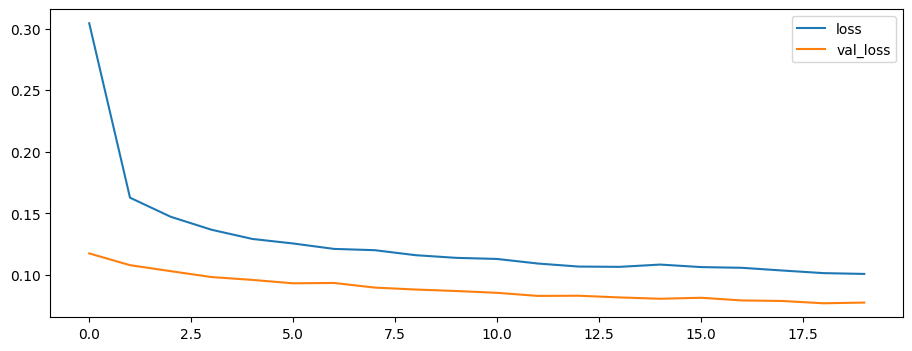

In [39]:
# Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test))

losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

model.metrics_names

In [42]:
# evaluating the model

y_pred = model.predict(X_test)
y_pred_1 = (y_pred > 0.75)

print(confusion_matrix(y_test,y_pred_1))
print(classification_report(y_test,y_pred_1))

235/235 [==============================] - 1s 6ms/step
[[3386   87]
 [ 117 3909]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3473
           1       0.98      0.97      0.97      4026

    accuracy                           0.97      7499
   macro avg       0.97      0.97      0.97      7499
weighted avg       0.97      0.97      0.97      7499

